# Naive Bayes Classification

#### 나이브 베이즈 : 스팸 메일 필터, 텍스트 분류, 감정 분석, 추천 시스템 등에 광범위하게 활용되는 분류 기법

## 1. Classification workflow

##### * 출처: [머신러닝 - 1. 나이브 베이즈 분류 (Naive Bayes Classification)](https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification)

### 예시: 스팸 메일

Label : 원하는 분류 결과 --> 스팸 메일인지 아닌지의 여부   
Feature : Label 결과에 영항을 주는 요소 --> 스팸 메일의 제목 및 내용에 기재된 광고성 단어, 비속어, 성적 용어 등

### 훈련 단계 데이터와 테스트 데이터

In [1]:
from IPython.display import Image

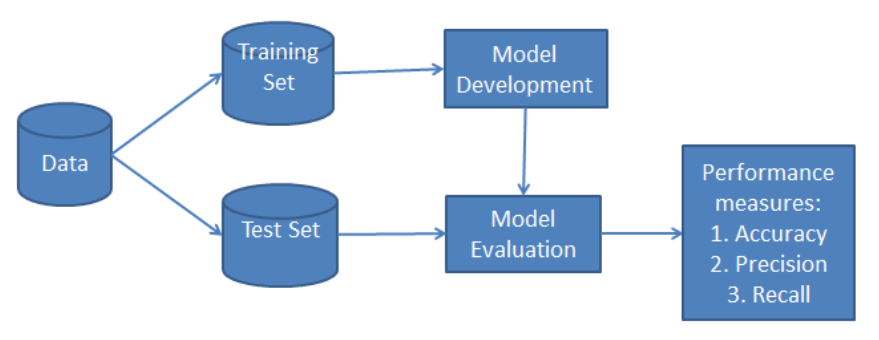

In [2]:
Image('./data classification.png')

## 2. 나이브 베이즈 분류기(Naive Bayes Classifier)란 무엇인가?

베이즈 정리에 기반한 통계적 분류 기법으로, 지도 학습 (supervised learning) 중 하나

### 1) 나이브 베이즈 장점과 단점

#### - 장점

- 간단하고, 빠르며, 정확하다
- computation cost가 작다.
- 큰 데이터셋에 적합하다.
- 연속형보다 이산형 데이터에서 성능이 좋다.
- Multiple class 예측을 위해서도 사용할 수 있습니다.

#### - 단점

- feature 간의 독립성이 있어야 사용할 수 있다 --> feature 간 상관관계가 없어야 한다

## 3. 나이브 베이즈 분류기 (Naive Bayes Classifier) 사용

##### * 출처 : [뉴스그룹 데이터 분류하기(Classification of 20 News Group with Naive Bayes Classifier)](https://wikidocs.net/22892)

#### 1) 뉴스 데이터 로드

In [3]:
from sklearn.datasets import fetch_20newsgroups

fetch_20newsgroups : 20개의 뉴스 그룹(일종의 주제별 커뮤니티 게시판)에서 모은 게시물

In [4]:
# 훈련 데이터 다운로드
newsdata=fetch_20newsgroups(subset='train')

In [5]:
newsdata.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
# 훈련용 샘플의 개수
print (len(newsdata.data), len(newsdata.filenames), len(newsdata.target_names), len(newsdata.target))

11314 11314 20 11314


In [7]:
# 카테고리 조회
newsdata.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [8]:
newsdata.target[0]

7

In [9]:
newsdata.target_names[7]

'rec.autos'

In [10]:
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

#### 2) 나이브 베이즈 분류

In [11]:
from sklearn.feature_extraction.text import CountVectorizer # 단어 카운트
from sklearn.feature_extraction.text import TfidfTransformer # 카운트 행렬을 표준화 된 tf 또는 tf-idf 표현으로 변환
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

In [12]:
dtmvector = CountVectorizer()

In [13]:
X_train_dtm = dtmvector.fit_transform(newsdata.data)

In [14]:
X_train_dtm.shape

(11314, 130107)

In [15]:
tfidf_transformer = TfidfTransformer()

In [16]:
tfidfv = tfidf_transformer.fit_transform(X_train_dtm)

In [17]:
tfidfv.shape

(11314, 130107)

In [18]:
mod = MultinomialNB()

In [19]:
mod.fit(tfidfv, newsdata.target)

MultinomialNB()

In [20]:
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB()

In [21]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True) #테스트 데이터 갖고오기

In [22]:
X_test_dtm = dtmvector.transform(newsdata_test.data) #테스트 데이터를 DTM으로 변환

In [23]:
tfidfv_test = tfidf_transformer.transform(X_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [24]:
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측

In [25]:
print("정확도:", accuracy_score(newsdata_test.target, predicted)) #예측값과 실제값 비교

정확도: 0.7738980350504514
